## Ejercicio 2: TITANIC.

### IMPORTAMOS LIBRERIAS.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### CARGAMOS EL DATAFRAME.

In [2]:
df_titanic = pd.read_csv(r"C:\Users\Dell3721\Documents\GitHub\ONLINE_DS_THEBRIDGE_PEPE-REINA\Sprint_8\Unidad_2\No_obligatorias\data\titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## DEMOSTRACIONES:

### 1- El titanic fue un accidente con una tasa de mortalidad alta.  

In [3]:
Total = df_titanic.shape[0]
print( "De los", Total, "pasajero los supervivientes fallecidos totales fueron:")
print(df_titanic["alive"].value_counts())
print()
print("Graficamente:")




De los 891 pasajero los supervivientes fallecidos totales fueron:
alive
no     549
yes    342
Name: count, dtype: int64

Graficamente:


En numeros relativos es así:
alive
no     61.616
yes    38.384
Name: proportion, dtype: float64

Graficamente:


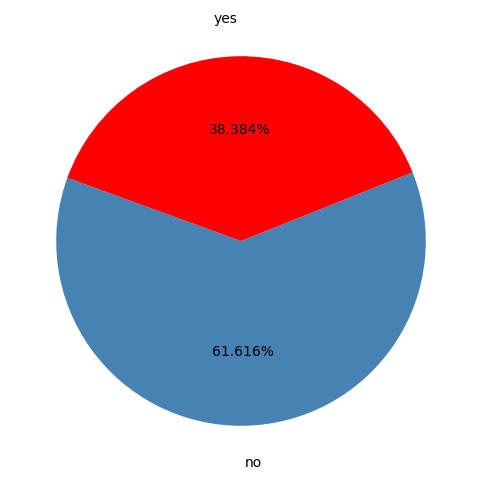

In [4]:
print("En numeros relativos es así:")
print(round((df_titanic["alive"].value_counts(normalize=True)*100),3))
print()
print("Graficamente:")

data = df_titanic["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (6,6))
colors = ['steelblue', 'red']
ax.pie(data.values,
        labels=data.index,
        autopct='%.3f%%', startangle= 160,  colors=colors, labeldistance=1.2);
plt.savefig("Imagenes_creadas/fue_una_tragedia.png")

### 1- NO MURIERON POR IGUAL. 

#### HOMBRES, MUJERES Y NIÑOS

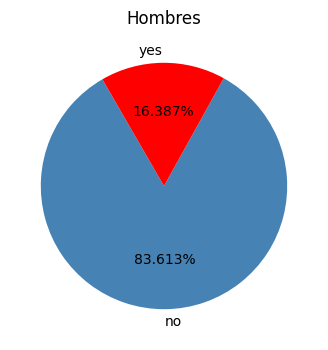

In [5]:
df_hombres = df_titanic[df_titanic['who'] == 'man']

data = df_hombres["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))
colors = ['steelblue', 'red']
ax.pie(data.values,
        labels=data.index,
        autopct='%.3f%%', startangle= 120,  colors=colors, labeldistance=1.1);
ax.set_title('Hombres',loc='center');
plt.savefig("Imagenes_creadas/muerte_hombres.png")

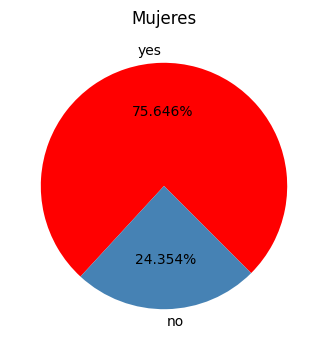

In [6]:
df_mujeres = df_titanic[df_titanic['who'] == 'woman']

data = df_mujeres["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))
colors = ['red', 'steelblue']
ax.pie(data.values,
        labels=data.index,
        autopct='%.3f%%', startangle= -45,  colors=colors, labeldistance=1.1);
ax.set_title('Mujeres',loc='center');
plt.savefig("Imagenes_creadas/muerte_mujeres.png")

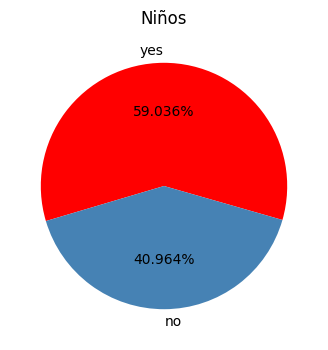

In [7]:

df_niños = df_titanic[df_titanic['who'] == 'child']

data = df_niños["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))
colors = ['red', 'steelblue']
ax.pie(data.values,
        labels=data.index,
        autopct='%.3f%%', startangle= -16,  colors=colors, labeldistance=1.1);
ax.set_title('Niños',loc='center');
plt.savefig("Imagenes_creadas/muerte_niños.png")

#### ¿CUANTOS HOMBRES, MUJERES Y NIÑOS HABIA EN EL TITANIC PORCENTUALMENTE?

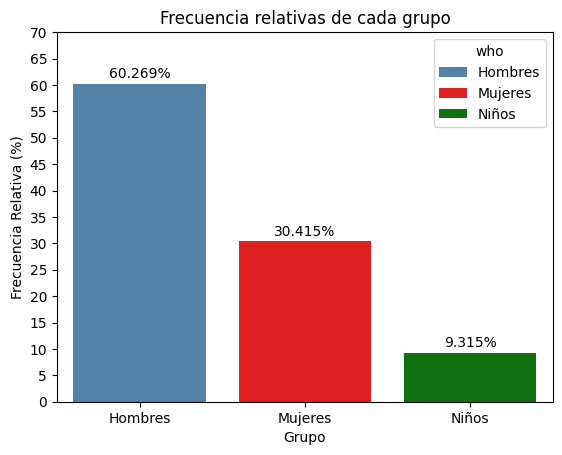

In [17]:
español = {'man': 'Hombres', 'woman': 'Mujeres', 'child': 'Niños'}
df_titanic['who'] = df_titanic['who'].replace(español)
valores = df_titanic.who.value_counts(normalize = True) * 100
paleta_colores = {'Hombres': 'steelblue', 'Mujeres': 'red', 'Niños': 'green'}
sns.barplot(x = valores.index, y = valores.values,hue =  valores.index, palette=paleta_colores, legend=True)
for i in range(len(valores)):
    plt.text(i, valores.values[i] + 1, f'{valores.values[i]:.3f}%', ha='center')
plt.yticks(range(0, 71, 5))
plt.title('Frecuencia relativas de cada grupo');
plt.xlabel('Grupo')
plt.ylabel('Frecuencia Relativa (%)');
plt.savefig("Imagenes_creadas/grupos.png")



#### ¿CUANTAS PERSONAS DE CADA CLASE HABIA EN EL TITANIC PORCENTUALMENTE?

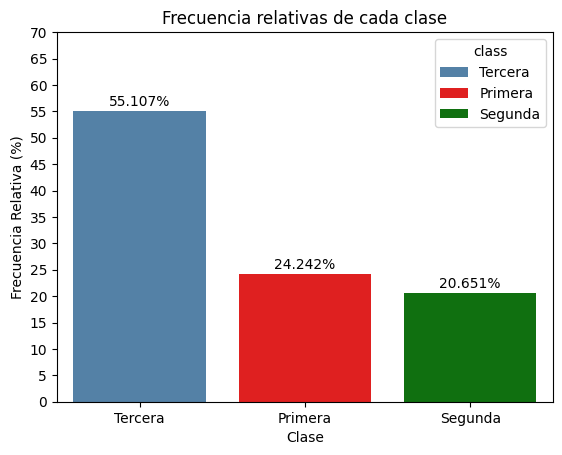

In [18]:
español_clase = {'First': 'Primera', 'Second': 'Segunda', 'Third': 'Tercera'}
df_titanic['class'] = df_titanic['class'].replace(español_clase)
valores_clase = df_titanic['class'].value_counts(normalize=True) * 100
paleta_colores_clase = {'Primera': 'red', 'Segunda': 'green', 'Tercera': 'steelblue'}
sns.barplot(x = valores_clase.index, y = valores_clase.values,hue =  valores_clase.index, palette=paleta_colores_clase, legend=True)
for i in range(len(valores_clase)):
    plt.text(i, valores_clase.values[i] + 1, f'{valores_clase.values[i]:.3f}%', ha='center')
plt.yticks(range(0, 71, 5))
plt.title('Frecuencia relativas de cada clase');
plt.xlabel('Clase')
plt.ylabel('Frecuencia Relativa (%)');
plt.savefig("Imagenes_creadas/clase.png")

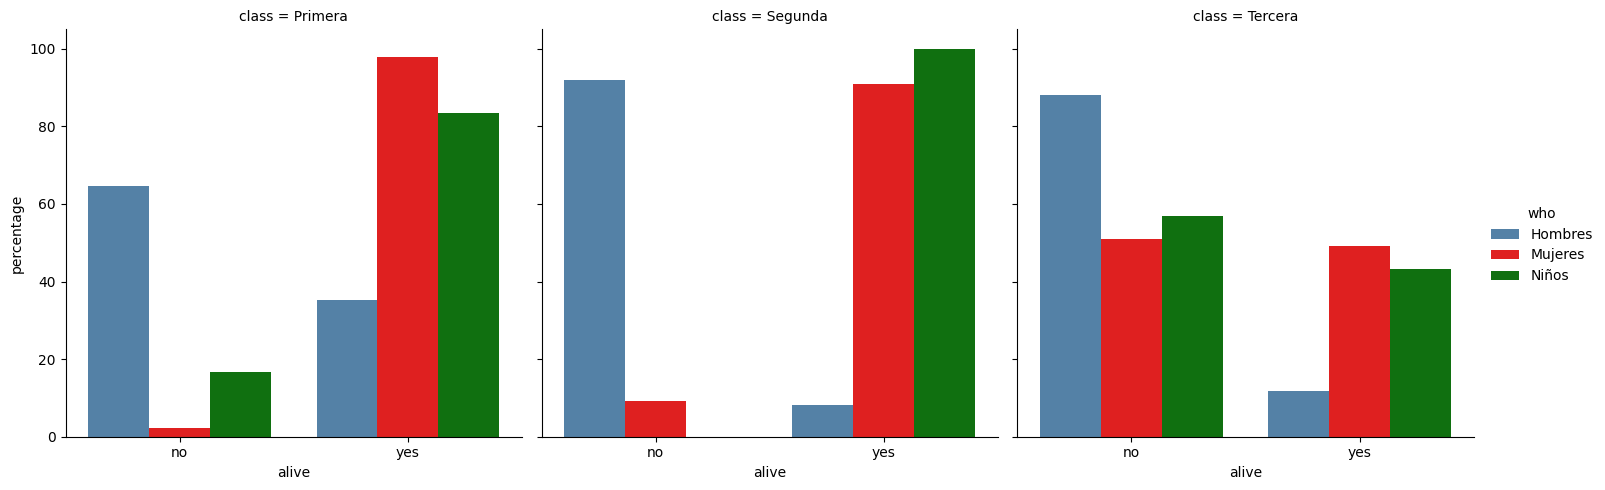

In [38]:

valores_por_clase_y_persona = df_titanic.groupby(['class', 'who'])['alive'].value_counts(normalize=True) * 100
valores_por_clase_y_persona = valores_por_clase_y_persona.rename('percentage').reset_index()

sns.catplot(x='alive', y='percentage', col='class', hue='who', palette=paleta_colores, kind='bar', data=valores_por_clase_y_persona);

plt.savefig("Imagenes_creadas/juntos.png")



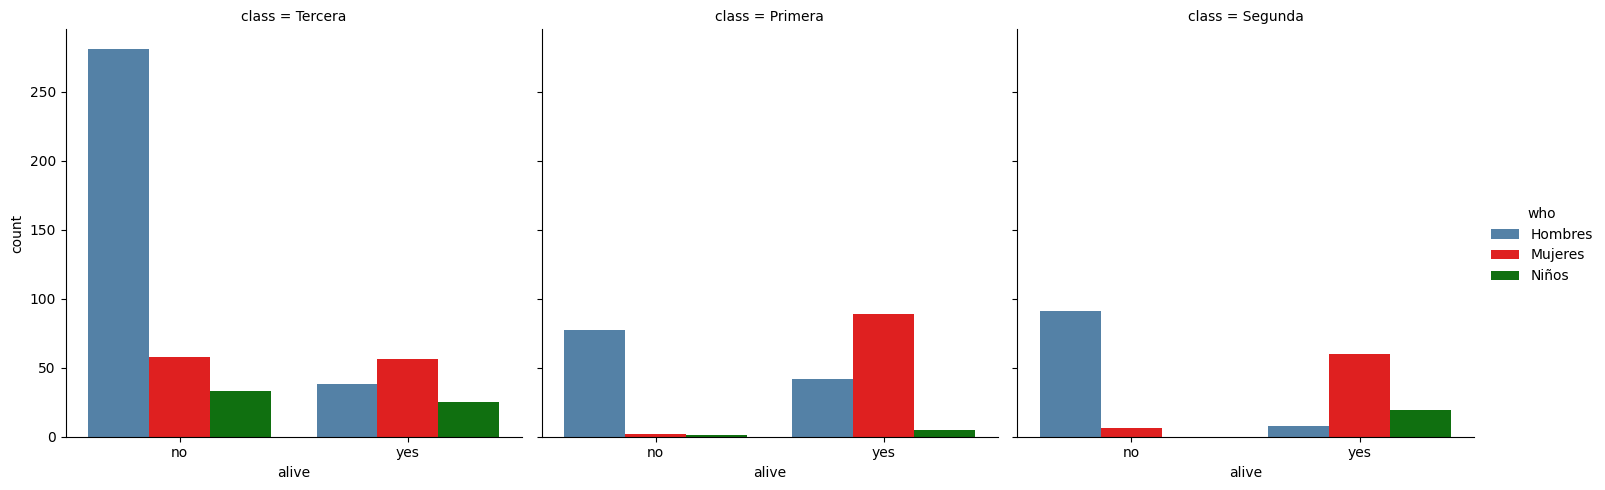

In [27]:
sns.catplot(x= "alive", col = "class", hue = "who",palette=paleta_colores, data = df_titanic, kind = "count")

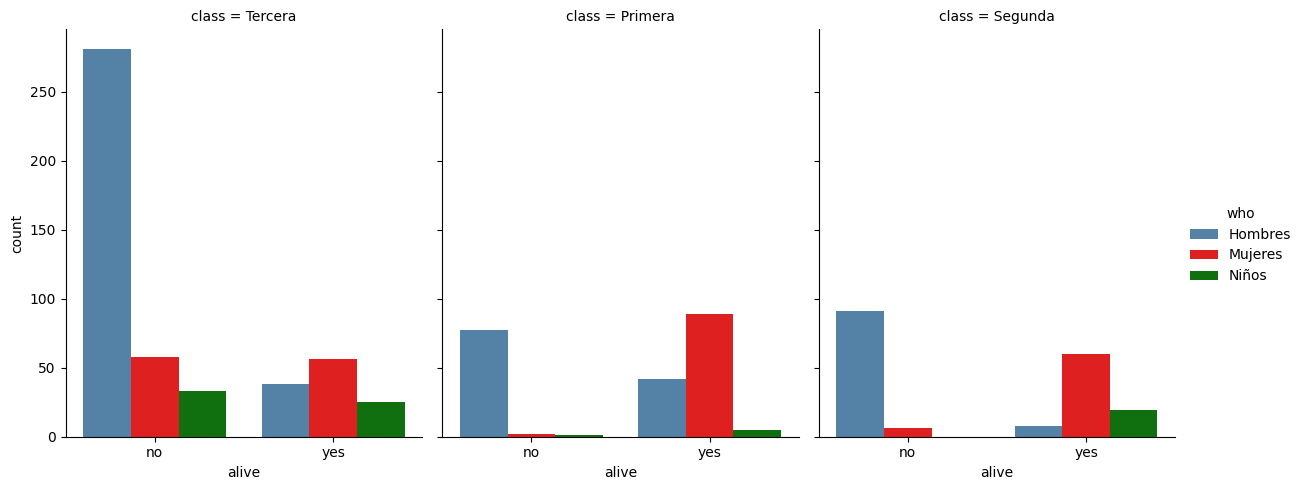